In [10]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

import pandas as pd

In [11]:
mms = 1
qtc = 0.703
fsc = 31
test_tone = 31
virtual_damping_coefficient = 7
spring_coefficient = 37938.75932
damping_coefficient = 277.0679154
electromagnetic_force_coefficient = 1

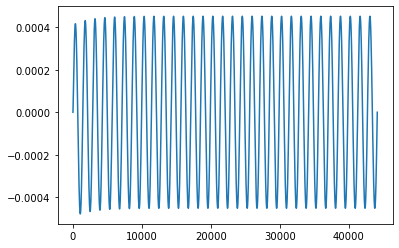

In [12]:
timeDelta = 1/44100
endTime = 1
time = 0

initial_position = 0
initial_velocity = 0

def get_row(position, velocity):
    global time;
    spring_force = spring_coefficient * position * -1
    damping_force = damping_coefficient * velocity * -1
    virtual_damping_force = virtual_damping_coefficient * damping_force
    virtual_damping_voltage = virtual_damping_force * electromagnetic_force_coefficient
    signal = np.sin(2*np.pi * test_tone * time)
    electromagnetic_force = signal * electromagnetic_force_coefficient
    output_voltage = virtual_damping_voltage + signal
    total_force = spring_force + damping_force + electromagnetic_force + virtual_damping_force
    acceleration = total_force * mms
    
    return {
        'Time': time,
        'Position': position,
        'Velocity': velocity,
        'Acceleration': acceleration,
        'Total Force': total_force,
        'Spring Force': spring_force,
        'Damping Force': damping_force,
        'Virtual Damping Force': virtual_damping_force,
        'Virtual Damping Voltage': virtual_damping_voltage,
        'Output Voltage': output_voltage,
        'Electromagnetic Force': electromagnetic_force,
        'Signal': signal
    }

initial_row = {
        'Time': [],
        'Position': [],
        'Velocity': [],
        'Acceleration': [],
        'Total Force': [],
        'Spring Force': [],
        'Damping Force': [],
        'Virtual Damping Force': [],
        'Virtual Damping Voltage': [],
        'Output Voltage': [],
        'Electromagnetic Force': [],
        'Signal': []
    }

df = pd.DataFrame(data=initial_row)

df = df.append(get_row(initial_position,initial_velocity), ignore_index=True)

while (time < endTime):
    time += timeDelta
    last_row = df.iloc[len(df) - 1]
#     print(last_row["Velocity"])

    new_velocity = last_row["Velocity"] + last_row["Acceleration"] * timeDelta
    new_position = last_row["Position"] + new_velocity * timeDelta

    new_row = get_row(new_position, new_velocity)
    df = df.append(new_row, ignore_index=True)

plt.plot(df['Velocity'])

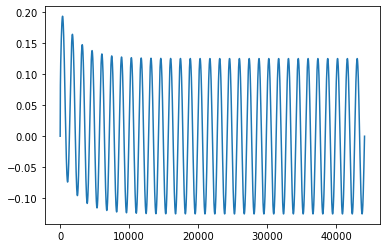

In [14]:
output_numpy = df['Output Voltage'].to_numpy()
wavfile.write("output.wav", 44100, output_numpy)
# wavfile.write("input.wav", 44100, input_v)
plt.plot(output_numpy)